<a href="https://colab.research.google.com/github/shashank-1214/task1-project/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Load Dataset
file_path = "/content/Dataset .csv"   # Change if needed
df = pd.read_csv(file_path)

# Step 3: Data Preprocessing

# Drop unnecessary columns
drop_columns = ['Restaurant ID', 'Restaurant Name',
                'Address', 'Locality', 'Locality Verbose']
df.drop(columns=drop_columns, inplace=True)

# Remove missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 4: Select Features for Recommendation
features = ['City', 'Cuisines', 'Price range',
            'Average Cost for two', 'Votes']

recommendation_data = df[features]

# Step 5: Compute Similarity Matrix
similarity_matrix = cosine_similarity(recommendation_data)

# ------------------------------------------
# Recommendation Function
# ------------------------------------------
def recommend_restaurants(city, cuisine, price_range, top_n=5):

    # Encode user input
    city_encoded = label_encoders['City'].transform([city])[0] \
        if city in label_encoders['City'].classes_ else 0

    cuisine_encoded = label_encoders['Cuisines'].transform([cuisine])[0] \
        if cuisine in label_encoders['Cuisines'].classes_ else 0

    # Create user preference vector
    user_vector = np.array([[city_encoded,
                             cuisine_encoded,
                             price_range,
                             df['Average Cost for two'].mean(),
                             df['Votes'].mean()]])

    # Compute similarity with all restaurants
    similarities = cosine_similarity(user_vector, recommendation_data)

    # Get top similar restaurant indices
    similar_indices = similarities.argsort()[0][-top_n:][::-1]

    return df.iloc[similar_indices][['City',
                                     'Cuisines',
                                     'Price range',
                                     'Aggregate rating',
                                     'Votes']]

# ------------------------------------------
# Step 6: Test Recommendation System
# ------------------------------------------

sample_recommendations = recommend_restaurants(
    city='New Delhi',
    cuisine='North Indian',
    price_range=3,
    top_n=5
)

print("Recommended Restaurants:")
print(sample_recommendations)

Recommended Restaurants:
      City  Cuisines  Price range  Aggregate rating  Votes
5885    87      1329            3               3.7    151
4319    87      1478            3               4.2    162
8421    88      1520            3               3.0    203
2587    87      1102            3               2.6    125
7475    87      1102            3               3.6    141


Recommended Restaurants:
      City  Cuisines  Price range  Aggregate rating  Votes
5885    87      1329            3               3.7    151
4319    87      1478            3               4.2    162
8421    88      1520            3               3.0    203
2587    87      1102            3               2.6    125
7475    87      1102            3               3.6    141


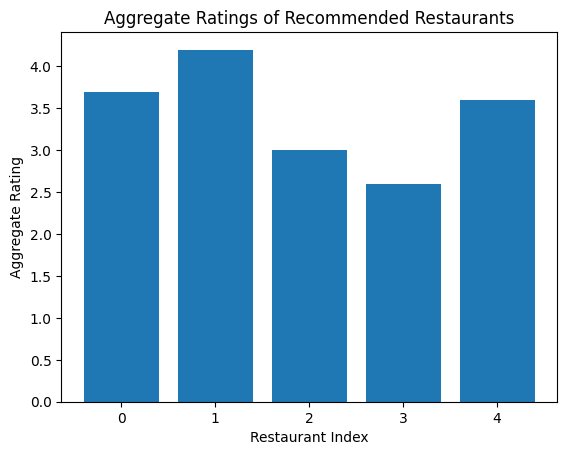

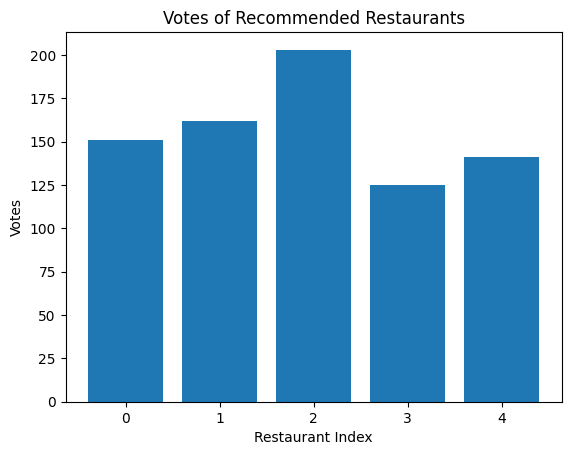

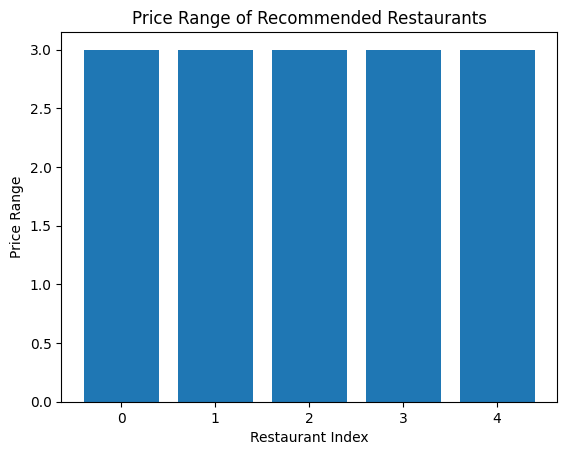

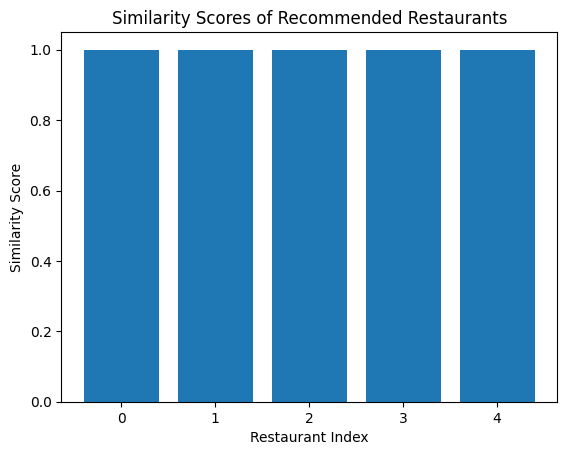

In [6]:
import matplotlib.pyplot as plt

# Get recommendations
recommended = recommend_restaurants(
    city='New Delhi',
    cuisine='North Indian',
    price_range=3,
    top_n=5
)

print("Recommended Restaurants:")
print(recommended)

# ------------------------------------------
# 1️⃣ Aggregate Rating of Recommended Restaurants
# ------------------------------------------
plt.figure()
plt.bar(range(len(recommended)), recommended['Aggregate rating'])
plt.title("Aggregate Ratings of Recommended Restaurants")
plt.xlabel("Restaurant Index")
plt.ylabel("Aggregate Rating")
plt.show()


# ------------------------------------------
# 2️⃣ Votes Distribution of Recommended Restaurants
# ------------------------------------------
plt.figure()
plt.bar(range(len(recommended)), recommended['Votes'])
plt.title("Votes of Recommended Restaurants")
plt.xlabel("Restaurant Index")
plt.ylabel("Votes")
plt.show()


# ------------------------------------------
# 3️⃣ Price Range Distribution
# ------------------------------------------
plt.figure()
plt.bar(range(len(recommended)), recommended['Price range'])
plt.title("Price Range of Recommended Restaurants")
plt.xlabel("Restaurant Index")
plt.ylabel("Price Range")
plt.show()


# ------------------------------------------
# 4️⃣ Similarity Scores Visualization
# ------------------------------------------

# Recalculate similarity for visualization
city_encoded = label_encoders['City'].transform(['New Delhi'])[0] \
    if 'New Delhi' in label_encoders['City'].classes_ else 0

cuisine_encoded = label_encoders['Cuisines'].transform(['North Indian'])[0] \
    if 'North Indian' in label_encoders['Cuisines'].classes_ else 0

user_vector = np.array([[city_encoded,
                         cuisine_encoded,
                         3,
                         df['Average Cost for two'].mean(),
                         df['Votes'].mean()]])

similarities = cosine_similarity(user_vector, recommendation_data)

top_indices = similarities.argsort()[0][-5:][::-1]
top_scores = similarities[0][top_indices]

plt.figure()
plt.bar(range(len(top_scores)), top_scores)
plt.title("Similarity Scores of Recommended Restaurants")
plt.xlabel("Restaurant Index")
plt.ylabel("Similarity Score")
plt.show()